In [6]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# To suppress numeric values from being returned in exponential format
pd.options.display.float_format = '{:20,.2f}'.format

# To display all charts against a white background
plt.style.use('seaborn-whitegrid')

In [7]:
# Loading data into dataframes using Pandas
contact_df = pd.read_csv("..\\data\\contact.csv")
customer_df = pd.read_csv("..\\data\\customer.csv")
product_df = pd.read_csv("..\\data\\product.csv")
state_df = pd.read_csv("..\\data\\state.csv")
txn_df = pd.read_csv("..\\data\\txn.csv")
touch_df = pd.read_csv("..\\data\\touch.csv")


In [8]:
print('Contact (rows): %d' %contact_df.shape[0])
print('Customer (rows): %d' %customer_df.shape[0])
print('Product (rows): %d' %product_df.shape[0])
print('State (rows): %d' %state_df.shape[0])
print('Transactions (rows): %d' %txn_df.shape[0])
print('Touches (rows): %d' %touch_df.shape[0])


Contact (rows): 210010
Customer (rows): 3876
Product (rows): 426
State (rows): 50
Transactions (rows): 90010
Touches (rows): 16974


In [9]:
query = "select * from contact_df limit 10"
sqldf(query, globals())

,contact_id,first_name,last_name,city,state_code,Zip,country,latitude,longitude,customer_id,status,opportunity
0,108437513,Coleman,Barbu,Mayaguez,PR,680.00,USA,64.13,-145.75,"600,429,503.00",Active,"30,000.00"
1,621672267,Ramu,Chier,Mayaguez,PR,680.00,USA,18.20,-67.14,"450,058,328.00",Active,"10,000.00"
2,243948535,Sanders,Groome,Ponce,PR,717.00,USA,64.13,-145.75,"450,057,386.00",Active,"20,000.00"
3,259246539,Manon,Scheyer,Ponce,PR,717.00,USA,64.13,-145.75,"450,057,385.00",Active,"20,000.00"
4,791622718,Kole,Etshman,Ponce,PR,717.00,USA,64.13,-145.75,"450,056,907.00",Active,"20,000.00"
5,816406727,Daylan,Delafuente,Ponce,PR,717.00,USA,64.13,-145.75,"450,058,250.00",Active,"20,000.00"
6,245985281,Elvia,Trento,St Thomas,VI,802.00,USA,42.77,-81.19,"600,429,387.00",Active,"28,000.00"
7,447276104,Bradee,Vincie,St John,VI,830.00,USA,18.33,-64.74,"600,429,590.00",Active,"20,000.00"
8,113143209,Natishanbush,Krupka,San Juan,PR,907.00,USA,19.02,72.86,"450,059,305.00",Active,"40,000.00"
9,232278818,Fredi,Menickella,San Juan,PR,907.00,USA,64.13,-145.75,"450,059,631.00",Active,"40,000.00"


In [20]:
# Are higher sales due to a higher number of touches?
query  ='''
select customer_name, count(distinct touch_df.txn_id) as touches, round(sum(txn_df.sales)/100000,2) as sales_100k
from customer_df inner join contact_df on customer_df.customer_id = contact_df.customer_id
    inner join touch_df on contact_df.contact_id = touch_df.contact_id
    inner join txn_df on contact_df.contact_id = txn_df.contact_id
group by 1
having sum(txn_df.sales) > 1000000
limit 25
'''

sales_touches_by_cust_df = sqldf(query, globals())
sales_touches_by_cust_df.head()

,customer_name,touches,sales_100k
0,109-111 GRAHAM AVE LLC,8,47.27
1,122 WATSON LLC,2,12.11
2,"132 HARTSHORN JMPOG, LLC",8,15.88
3,14 FOREST PLACE LLC,14,13.23
4,1438 PARKVIEW LLC,2,12.09


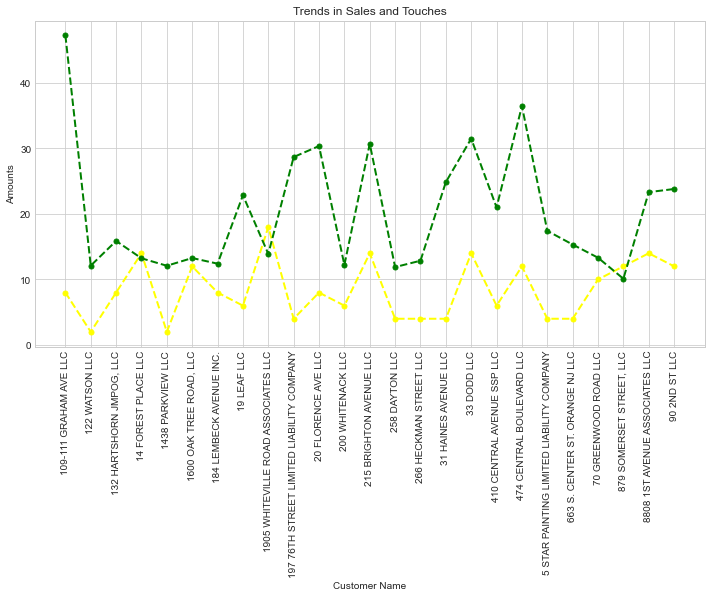

In [26]:
plt.figure(figsize=(12,6))

plt.plot(sales_touches_by_cust_df.customer_name, sales_touches_by_cust_df.touches, color='yellow', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.plot(sales_touches_by_cust_df.customer_name, sales_touches_by_cust_df.sales_100k, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel('Customer Name')
plt.ylabel('Amounts')
plt.title('Trends in Sales and Touches')
# plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
labels = sales_touches_by_cust_df.customer_name
ax = plt.gca()
ax.set_xticklabels(labels = labels, rotation = 90)
plt.show()

In [27]:
# Does a low count in touches result in higher redemptions?
query  ='''
select customer_name, count(touch_df.txn_id) as touches, abs(round(sum(txn_df.redemptions)/10000,2)) as redemptions_10k
from customer_df inner join contact_df on customer_df.customer_id = contact_df.customer_id
    inner join touch_df on contact_df.contact_id = touch_df.contact_id
    inner join txn_df on contact_df.contact_id = txn_df.contact_id
group by 1
having abs(sum(txn_df.redemptions)) > 250000
'''

redemptions_touches_by_cust_df = sqldf(query, globals())
redemptions_touches_by_cust_df.head()

,customer_name,touches,redemptions_10k
0,302 OSBOURNE NJ LLC,70,32.23
1,AL FASSEEH INC.,78,28.41
2,ALL GOOD PANINI AND PIZZA LLC,56,35.89
3,BOUTIQUE NAIL SPA LLC,34,30.60
4,FRESH BUI LLC,50,28.71


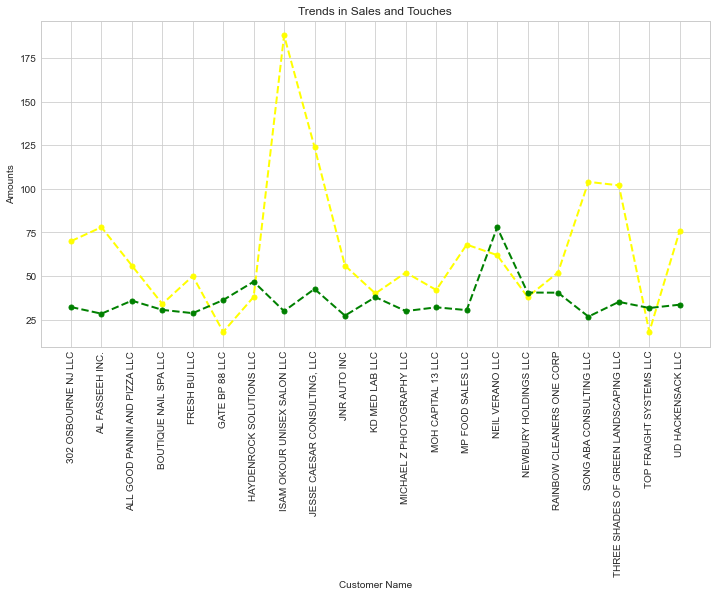

In [28]:
plt.figure(figsize=(12,6))

plt.plot(redemptions_touches_by_cust_df.customer_name, redemptions_touches_by_cust_df.touches, color='yellow', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.plot(redemptions_touches_by_cust_df.customer_name, redemptions_touches_by_cust_df.redemptions_10k, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel('Customer Name')
plt.ylabel('Amounts')
plt.title('Trends in Sales and Touches')
# plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
labels = redemptions_touches_by_cust_df.customer_name
ax = plt.gca()
ax.set_xticklabels(labels = labels, rotation = 90)
plt.show()

In [49]:
# Do all highly sold funds belong to Morning Star Rating 4 and above?
query = '''
select product_name, max(ms_rating) as ms_rating, round(sum(sales), 2)/1000000 as sales_mil
from product_df inner join txn_df on product_df.ticker = txn_df.product_id
group by 1
having sum(sales) > 1000000
order by 3 desc
'''

sales_by_product_df = sqldf(query, globals())
sales_by_product_df.head()

,product_name,ms_rating,sales_mil
0,Vanguard LifeStrategy Cnsrv Gr Inv,4,8.724672
1,Vanguard 500 Index Inv,4,8.684420
2,Matthews China Investor,3,8.131187
3,Ivy Asset Strategy C,2,7.706410
4,Vanguard Interm-Term Invmt-Grade Inv,3,7.560909


In [52]:
# Is there a correlation between geographic regions and higher sales?
query = '''
select region, round(sum(sales), 2)/1000000 as sales_mil, count(distinct contact_df.contact_id) as contact_count
from state_df inner join contact_df on state_df.state_code = contact_df.state_code
    inner join txn_df on contact_df.contact_id = txn_df.contact_id
group by 1
having sum(txn_df.sales) > 1000000
order by 2 desc
'''

sales_by_region_df = sqldf(query, globals())
sales_by_region_df.head()

,region,sales_mil,contact_count
0,Northern,540.647342,7142
1,Pacific,258.062935,3158
2,Central,214.030507,2893
3,Southern,195.610116,2547
4,Western,85.972605,1209
